In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('Data_AllFea.csv')
data

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,3.694444,3.694444,0.523148,0.523148,0.357952,76.143,64.047,76.098951,32,0,...,0,0,0,0,0,0,0,0,0,0
1,2.405417,2.405417,1.355000,1.355000,0.414571,142.246,124.102,142.145901,58,0,...,0,0,0,0,0,0,0,0,0,0
2,2.000000,2.000000,2.000000,2.000000,0.353059,46.093,38.029,46.065126,20,0,...,0,0,0,0,0,0,0,0,0,0
3,3.818102,3.818102,0.802546,0.802546,0.470034,118.224,100.080,118.145901,50,0,...,0,0,0,0,0,0,0,0,0,0
4,3.770833,3.770833,0.250000,0.250000,0.419525,74.147,62.051,74.096426,32,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.153426,3.153426,1.095463,1.095463,0.591655,158.204,148.124,158.083301,58,0,...,0,0,0,0,0,0,0,0,0,0
140,3.025950,3.025950,1.095926,1.095926,0.686507,186.258,172.146,186.114601,70,0,...,0,0,0,0,0,0,0,0,0,0
141,2.992061,2.992061,1.191280,1.191280,0.676166,184.242,172.146,184.098951,68,0,...,0,0,0,0,0,0,0,0,0,0
142,2.423611,2.423611,1.375000,1.375000,0.445190,100.185,86.073,100.112076,42,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:, :data.shape[1]-1]
Y = data.iloc[:, data.shape[1]-1]

In [6]:
variances = X.var()

threshold_value = 1.0
X = X.loc[:, variances>threshold_value]
X

,MaxAbsEStateIndex,MaxEStateIndex,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_MWHI,BCUT2D_MRHI,BertzCT,Chi0,...,VSA_EState8,VSA_EState9,HeavyAtomCount,NHOHCount,NumAromaticRings,NumRotatableBonds,RingCount,MolLogP,MolMR,fr_unbrch_alkane
0,3.694444,3.694444,76.143,64.047,76.098951,32,14.688639,4.291382,18.854753,4.284457,...,2.993056,0.000000,5,6,0,1,0,-2.1413,20.1052,0
1,2.405417,2.405417,142.246,124.102,142.145901,58,15.504027,4.561340,110.807256,7.242641,...,8.479167,4.810833,10,0,0,0,3,-0.0932,41.5708,0
2,2.000000,2.000000,46.093,38.029,46.065126,20,14.740109,3.350861,2.754888,2.707107,...,0.000000,4.000000,3,2,0,0,0,-1.1906,13.7734,0
3,3.818102,3.818102,118.224,100.080,118.145901,50,14.546913,4.465764,45.793194,6.405777,...,4.381944,0.000000,8,6,0,4,0,-1.1135,33.9082,0
4,3.770833,3.770833,74.147,62.051,74.096426,32,14.665113,4.476639,19.119415,4.500000,...,6.229167,0.000000,5,3,0,0,0,0.0268,22.6411,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.153426,3.153426,158.204,148.124,158.083301,58,14.748250,5.443297,305.231590,8.225768,...,0.000000,0.000000,12,2,2,1,2,0.9818,44.9894,0
140,3.025950,3.025950,186.258,172.146,186.114601,70,14.607016,5.130251,330.552017,9.639982,...,0.000000,0.000000,14,2,2,3,2,1.1000,53.4034,0
141,2.992061,2.992061,184.242,172.146,184.098951,68,14.605694,5.681464,365.351567,9.639982,...,0.000000,0.000000,14,2,2,2,2,1.4852,54.9234,0
142,2.423611,2.423611,100.185,86.073,100.112076,42,14.844035,4.422571,23.793194,4.949747,...,2.750000,0.000000,7,2,0,0,1,0.1238,30.1274,0


<Axes: >

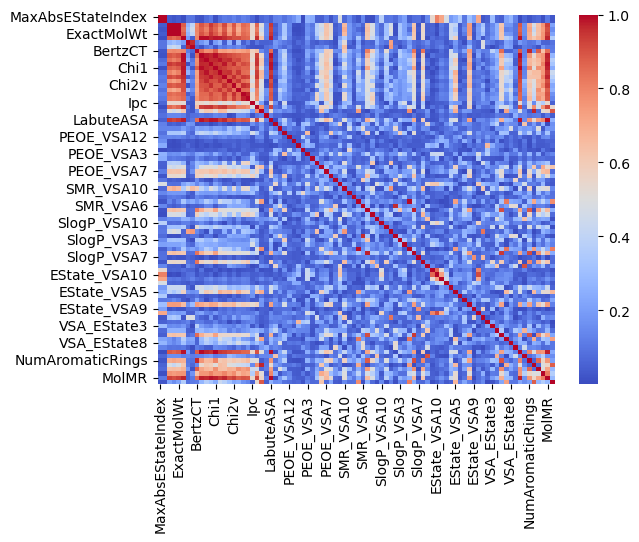

In [8]:
correlation_matrix = X.corr(method='pearson').abs()
sns.heatmap(correlation_matrix, cmap='coolwarm')

In [9]:
high_corr_features = np.where(correlation_matrix > 0.8)

to_drop = []
for i, j in zip(*high_corr_features):
    if i != j and i not in to_drop and j not in to_drop:
        to_drop.append(j)

X = X.drop(X.columns[to_drop], axis=1)
X

,MaxAbsEStateIndex,MolWt,BCUT2D_MWHI,BertzCT,Chi2n,Ipc,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA10,...,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState8,VSA_EState9,MolLogP
0,3.694444,76.143,14.688639,18.854753,1.393847,9.651484,2.175102,3.920000,11.467335,12.586597,...,0.0,6.923737,11.467335,0.0,0.000000,0.000000,7.317130,2.993056,0.000000,-2.1413
1,2.405417,142.246,15.504027,110.807256,4.580648,224.199861,1.742365,0.866591,8.966062,39.268538,...,0.0,0.000000,14.095344,0.0,0.000000,0.000000,0.000000,8.479167,4.810833,-0.0932
2,2.000000,46.093,14.740109,2.754888,0.577350,2.754888,1.960000,1.960000,5.316789,0.000000,...,0.0,19.412133,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,4.000000,-1.1906
3,3.818102,118.224,14.546913,45.793194,2.389629,56.625632,5.064509,4.088919,11.467335,0.000000,...,0.0,0.000000,18.391072,0.0,0.000000,0.000000,7.589630,4.381944,0.000000,-1.1135
4,3.770833,74.147,14.665113,19.119415,2.560660,3.609640,0.976756,9507.960000,5.733667,0.000000,...,0.0,0.000000,26.504879,0.0,0.000000,0.000000,4.020833,6.229167,0.000000,0.0268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.153426,158.204,14.748250,305.231590,2.552492,1023.952729,3.133048,1.320753,0.000000,0.000000,...,0.0,48.791890,9.967957,0.0,6.306852,0.000000,2.190926,0.000000,0.000000,0.9818
140,3.025950,186.258,14.607016,330.552017,3.316497,2714.305287,4.512089,2.391600,0.000000,0.000000,...,0.0,24.787374,34.233425,0.0,6.051899,0.000000,2.743672,0.000000,0.000000,1.1000
141,2.992061,184.242,14.605694,365.351567,3.000000,2714.305287,4.325415,2.263272,0.000000,0.000000,...,0.0,49.052843,22.119997,0.0,5.984122,0.000000,2.382560,0.000000,0.000000,1.4852
142,2.423611,100.185,14.844035,23.793194,2.280239,58.974148,3.026852,1.929382,5.316789,0.000000,...,0.0,0.000000,5.316789,0.0,0.000000,2.423611,0.000000,2.750000,0.000000,0.1238


<Axes: >

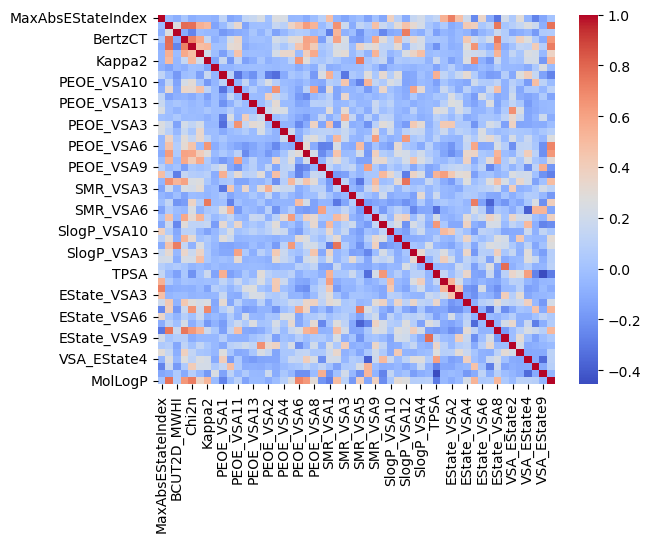

In [10]:
pearson_value = X.corr(method='pearson')
sns.heatmap(pearson_value, cmap='coolwarm')

# RFE

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [13]:
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=12)
Fea_Selected = rfe.fit(X_train, Y)

data = X.loc[:, Fea_Selected.support_]
data

,MaxAbsEStateIndex,BCUT2D_MWHI,Chi2n,Ipc,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA9,TPSA,EState_VSA4,VSA_EState4,VSA_EState8
0,3.694444,14.688639,1.393847,9.651484,2.175102,3.920000,11.467335,0.000000,55.28,6.544756,7.317130,2.993056
1,2.405417,15.504027,4.580648,224.199861,1.742365,0.866591,8.966062,14.095344,0.00,0.000000,0.000000,8.479167
2,2.000000,14.740109,0.577350,2.754888,1.960000,1.960000,5.316789,14.095344,16.61,0.000000,0.000000,0.000000
3,3.818102,14.546913,2.389629,56.625632,5.064509,4.088919,11.467335,13.089513,55.28,19.007419,7.589630,4.381944
4,3.770833,14.665113,2.560660,3.609640,0.976756,9507.960000,5.733667,5.538925,27.64,0.000000,4.020833,6.229167
...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.153426,14.748250,2.552492,1023.952729,3.133048,1.320753,0.000000,0.000000,28.28,11.387856,2.190926,0.000000
140,3.025950,14.607016,3.316497,2714.305287,4.512089,2.391600,0.000000,0.000000,28.28,12.841643,2.743672,0.000000
141,2.992061,14.605694,3.000000,2714.305287,4.325415,2.263272,0.000000,0.000000,28.28,0.000000,2.382560,0.000000
142,2.423611,14.844035,2.280239,58.974148,3.026852,1.929382,5.316789,13.089513,16.61,0.000000,0.000000,2.750000


In [14]:
data.insert(data.shape[1], 'target', Y)
data

,MaxAbsEStateIndex,BCUT2D_MWHI,Chi2n,Ipc,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA9,TPSA,EState_VSA4,VSA_EState4,VSA_EState8,target
0,3.694444,14.688639,1.393847,9.651484,2.175102,3.920000,11.467335,0.000000,55.28,6.544756,7.317130,2.993056,0
1,2.405417,15.504027,4.580648,224.199861,1.742365,0.866591,8.966062,14.095344,0.00,0.000000,0.000000,8.479167,0
2,2.000000,14.740109,0.577350,2.754888,1.960000,1.960000,5.316789,14.095344,16.61,0.000000,0.000000,0.000000,0
3,3.818102,14.546913,2.389629,56.625632,5.064509,4.088919,11.467335,13.089513,55.28,19.007419,7.589630,4.381944,0
4,3.770833,14.665113,2.560660,3.609640,0.976756,9507.960000,5.733667,5.538925,27.64,0.000000,4.020833,6.229167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.153426,14.748250,2.552492,1023.952729,3.133048,1.320753,0.000000,0.000000,28.28,11.387856,2.190926,0.000000,0
140,3.025950,14.607016,3.316497,2714.305287,4.512089,2.391600,0.000000,0.000000,28.28,12.841643,2.743672,0.000000,0
141,2.992061,14.605694,3.000000,2714.305287,4.325415,2.263272,0.000000,0.000000,28.28,0.000000,2.382560,0.000000,0
142,2.423611,14.844035,2.280239,58.974148,3.026852,1.929382,5.316789,13.089513,16.61,0.000000,0.000000,2.750000,0


In [15]:
data.to_csv('AfterDealData.csv', index=False)